In [1]:
#Dependencies - Import the stuff you need
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
#Read the files
# Read CSV and create data frames
city_df = pd.read_csv("raw_data/city_data.csv")
rider_df = pd.read_csv("raw_data/ride_data.csv")

# Merge our two data frames together
#combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
#combined_unemployed_data.head()

In [3]:
#merge the data frames on the common id city

new_df = pd.merge(left=city_df, right=rider_df,
                 how='left', left_on='city',
                 right_on='city')
fare_sum = new_df['fare'].sum()
fare_type = new_df.groupby(['type']).sum()

# fare_type.reset_index('type')
# type(fare_type)

In [4]:
new_df.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [5]:
rider_df.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [6]:
city_df.columns

Index(['city', 'driver_count', 'type'], dtype='object')

1. Average Fare ($) Per City

2. Total Number of Rides Per City

3. Total Number of Drivers Per City

4. City Type (Urban, Suburban, Rural)

In [7]:
avgFares_city = rider_df.groupby('city').mean() # for bubble plot

avgFares_city.head()

totRiders_city = rider_df.groupby(['city']).count() # for bubble plot
totRiders_city

cityFareSum_df = rider_df.groupby(['city']).sum()

totDrivers_city = city_df.groupby(['city']).sum() # for bubble plot

totType_city = city_df.groupby(['type']).count() # fort bubble plot

cityByType_df = city_df.groupby(['type'])




In [8]:
totRiders_city.head()

,date,fare,ride_id
city,,,
Alvarezhaven,31,31,31
Alyssaberg,26,26,26
Anitamouth,9,9,9
Antoniomouth,22,22,22
Aprilchester,19,19,19


In [9]:
totType_city

,city,driver_count
type,,
Rural,18,18
Suburban,42,42
Urban,66,66


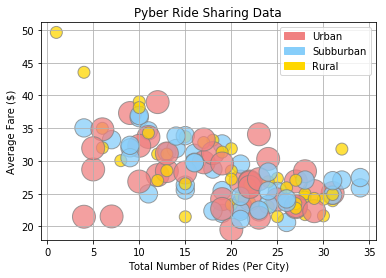

In [10]:
#create the bubble chart

fares = avgFares_city['fare']
#len(fares)
riders = totRiders_city['ride_id']
#len(riders)
size = totType_city['driver_count']

colors = ["gold","lightskyblue","lightcoral"]

# create data
x = riders # number of riders per city
y = fares # average fare per city
z = size # nbr drivers per city size of bubble



# Size of bubble is equal to nbr of drivers in a city
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*8, c=colors, alpha=0.75, edgecolors="grey")

# Add titles (main and on axis)
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")

red_patch = mpatches.Patch(color='lightcoral')
blue_patch = mpatches.Patch(color='lightskyblue')
gold_patch = mpatches.Patch(color='gold')

plt.legend([red_patch, blue_patch, gold_patch], ['Urban', 'Subburban','Rural']) 
plt.savefig('bubble.png')
plt.close('bubble.png')

plt.show()

% of total fares by city type

% of total rides by city type

% of total drivers by city type

In [11]:
# % of total fares by city type

r = new_df.loc[new_df["type"] == "Rural",:]
rural = r['fare'].sum()

u = new_df.loc[new_df["type"] == "Urban",:]
urban = u['fare'].sum()

s = new_df.loc[new_df["type"] == "Suburban",:]
subburban = s['fare'].sum()

print(f" rural {rural} urban {urban} sub {subburban}")

 rural 4255.09 urban 40078.33999999999 sub 20335.689999999973


In [12]:
#Plot first Pie Chart

cityType = ["Rural", "Suburban", "Urban"]
pie_votes = [rural,subburban,urban]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0)

In [13]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=cityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1157205f8>,
 [Text(-0.969829,0.519068,'Rural'),
  Text(-0.839065,-0.711316,'Suburban'),
  Text(0.967193,0.523963,'Urban')],
 [Text(-0.528998,0.283128,'6.6%'),
  Text(-0.457672,-0.387991,'31.4%'),
  Text(0.52756,0.285798,'62.0%')])

In [14]:
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Fares by City Type')

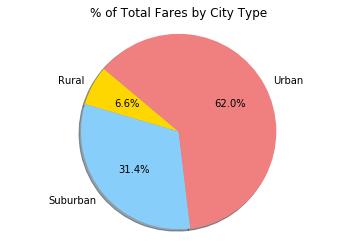

In [15]:
#save and show the graph
plt.savefig('pie1.png')
plt.close('pie1.png')


plt.show()

In [16]:
#total fare by city type

# total_fares = rider_df['fare'].sum()
# total_fares

#cityFareSum_df = rider_df.groupby(['city']).sum()

#cityFareSum_df.head()
#type_df = pd.DataFrame()
# cityByType_df = city_df.groupby(['type'])
# cityByType_df.columns
# type_df = cityByType_df["type", 'city']
# type_df.head()

# #riderByCity_df = rider_df.groupby(['city'])
# #riderByCity_df.head()




In [17]:
# rider_df['type']=city_df['type']
# rider_df

In [18]:
# #Merge the dataframes into a new df
# mCityRide_df = pd.merge(cityByType_df, riderByCity_df)

In [19]:
#Merge dataframes

#Merge the dataframes into a new df
# merged_df = pd.merge(city_df, rider_df)

In [20]:
# #count of type
# totFaresType_df = merged_df.groupby(['type']).count()

In [21]:
# totFaresType_df.head()


In [22]:
# #count of rides
# totridesType_df = merged_df.groupby(['type']).count()

In [23]:
# % of total rides by city type

r2 = new_df.loc[new_df["type"] == "Rural",:]
ruralRider = r2['fare'].count()

u2 = new_df.loc[new_df["type"] == "Urban",:]
urbanRider = u2['fare'].count()

s2 = new_df.loc[new_df["type"] == "Suburban",:]
subburbanRider = s2['fare'].count()

print(f" rural {ruralRider} urban {urbanRider} sub {subburbanRider}")

 rural 125 urban 1625 sub 657


In [24]:
#Plot second Pie Chart

cityType = ["Rural", "Suburban", "Urban"]
pie_votes = [ruralRider,subburbanRider,urbanRider]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0)

In [25]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=cityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1188b82e8>,
 [Text(-0.946305,0.560809,'Rural'),
  Text(-0.972796,-0.513487,'Suburban'),
  Text(1.04328,0.348661,'Urban')],
 [Text(-0.516166,0.305896,'5.2%'),
  Text(-0.530616,-0.280084,'27.3%'),
  Text(0.569062,0.190179,'67.5%')])

In [26]:
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Rides by City Type')

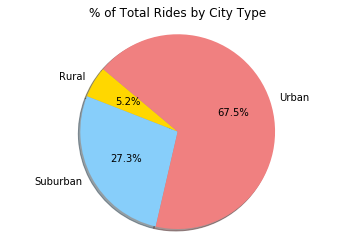

In [27]:
#show the graph
plt.savefig('pie2.png')
plt.close('pie2.png')
plt.show()

In [28]:
new_df.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [29]:
# % of total drivers by city type

r3 = new_df.loc[new_df["type"] == "Rural",:]
ruralDrive = r3['driver_count'].sum()

u3 = new_df.loc[new_df["type"] == "Urban",:]
urbanDrive = u3['driver_count'].sum()

s3 = new_df.loc[new_df["type"] == "Suburban",:]
subburbanDrive = s3['driver_count'].sum()

print(f" rural {ruralDrive} urban {urbanDrive} sub {subburbanDrive}")

 rural 727 urban 64501 sub 9730


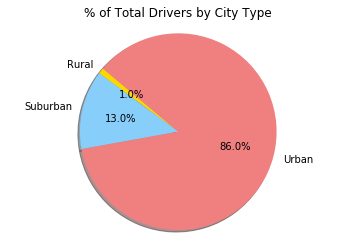

In [30]:
#Plot third Pie Chart

cityType = ["Rural", "Suburban", "Urban"]
pie_votes = [ruralDrive,subburbanDrive,urbanDrive]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=cityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best")

plt.title("% of Total Drivers by City Type")
#plt.xlabel("Years")
#plt.ylabel("Number of Wins/Losses")




#save and show the graph
plt.savefig('pie3.png')
plt.close('pie3.png')
plt.show()


Junkyard old code


In [31]:
#city_df.head()
# city_df['city'].count()
# cityFareSum_df['type']=city_df['type']
# cityFareSum_df
# Merge and create a new DF that combined the city and rider data together.
# new_df = pd.merge(left=city_df, right=rider_df,
#                  how='left', left_on='city',
#                  right_on='city')
# fare_sum = new_df['fare'].sum()
# fare_type = new_df.groupby(['type']).sum()

# fare_type.reset_index('type')
# type(fare_type)